In [1]:
import pandas as pd
import numpy as np
from main import get_model_df

In [2]:
# Load dataset
df = get_model_df()

high_cardinality_cols = ['model', 'brand']
country_code = ['country_code']
medium_cardinality_cols = ['case_material', 'movement']
numerical_cols = ['year_of_production', 'case_diameter']
rest_cols = ['condition', 'scope_of_delivery', 'year_unknown']


In [3]:
df = df[df["price"] < 500000]

# Use TargetEncoding for high cardinality columns
for col in high_cardinality_cols:
    df[col] = df.groupby(col)['price'].transform('mean')


In [4]:
print(df.shape)
df


(386438, 11)


,brand,model,price,movement,case_material,year_of_production,condition,scope_of_delivery,case_diameter,country_code,year_unknown
0,23870.639668,14844.861083,19995.0,Automatic,Gold/Steel,2024.0,1,1,41.0,US,0
1,23870.639668,12774.626285,8395.0,Automatic,Steel,2024.0,2,1,36.0,US,0
2,6399.509170,11372.940746,5500.0,Manual winding,Steel,2025.0,3,1,42.0,US,0
3,4316.199158,2371.727273,2190.0,Automatic,Steel,2012.0,2,1,42.0,HK,0
4,9158.035018,12339.683935,5895.0,Automatic,Steel,2019.0,4,3,42.0,US,0
...,...,...,...,...,...,...,...,...,...,...,...
386846,13525.314940,20145.521739,24166.0,Manual winding,White gold,2025.0,3,1,42.0,DE,0
386847,2135.152914,2160.229672,2051.0,Automatic,Steel,2025.0,3,1,43.5,DE,0
386848,1885.594051,1875.225131,2034.0,Automatic,Ceramic,2025.0,3,1,38.0,DE,0
386849,2135.152914,2160.229672,2084.0,Automatic,Steel,2025.0,3,1,43.5,DE,0


In [5]:
# Define training data
X = df[numerical_cols + medium_cardinality_cols + rest_cols + country_code + high_cardinality_cols]
y = df['price']

# Set country_code to 1 if country code is US, else 0
X.loc[:, 'country_code'] = np.where(df['country_code'] == 'US', 1, 0)

In [6]:
X


,year_of_production,case_diameter,case_material,movement,condition,scope_of_delivery,year_unknown,country_code,model,brand
0,2024.0,41.0,Gold/Steel,Automatic,1,1,0,1,14844.861083,23870.639668
1,2024.0,36.0,Steel,Automatic,2,1,0,1,12774.626285,23870.639668
2,2025.0,42.0,Steel,Manual winding,3,1,0,1,11372.940746,6399.509170
3,2012.0,42.0,Steel,Automatic,2,1,0,0,2371.727273,4316.199158
4,2019.0,42.0,Steel,Automatic,4,3,0,1,12339.683935,9158.035018
...,...,...,...,...,...,...,...,...,...,...
386846,2025.0,42.0,White gold,Manual winding,3,1,0,0,20145.521739,13525.314940
386847,2025.0,43.5,Steel,Automatic,3,1,0,0,2160.229672,2135.152914
386848,2025.0,38.0,Ceramic,Automatic,3,1,0,0,1875.225131,1885.594051
386849,2025.0,43.5,Steel,Automatic,3,1,0,0,2160.229672,2135.152914


<Axes: >

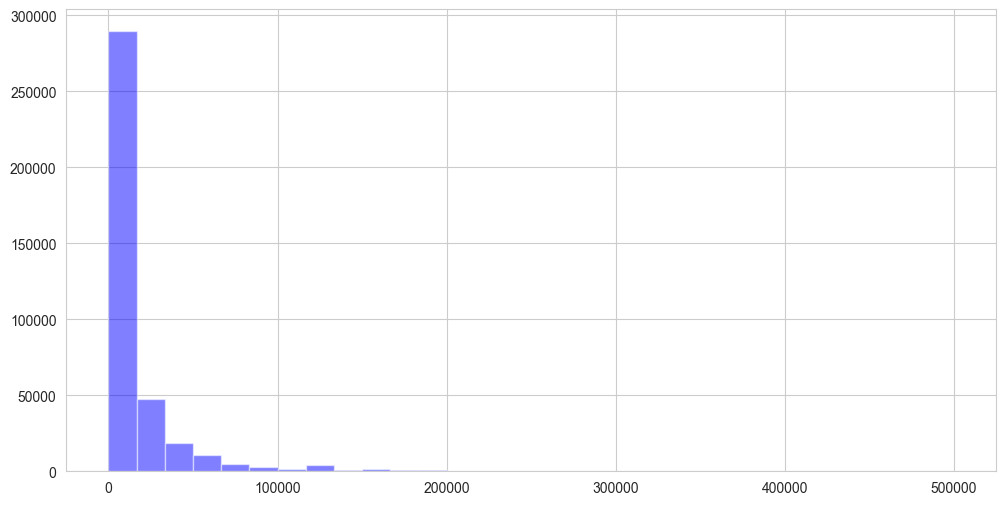

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))
y.hist(bins=30, alpha=0.5, color='blue', label='Price Distribution')

In [8]:
print(len(df[df["price"] > 200000]))

2303


In [9]:
print(2701/len(df)*100)

0.6989478260419524
